<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h1>Datenexploration, Statistische Analyse und Visualisierung</h1>
</div>
</div>

<div>
    <p>In diesem Teil haben wir Datenexploration, statistische Analyse und Visualisierung über die gesammelten Daten geführt. Dafür haben wir pandas, matplotlib.pylot, numpy und seaborn Bibliotheken benutzt. </p>
</div>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

In [ ]:
df = pd.read_csv("cleaned_all_data.csv")
df.rename(columns = {'Marka':'Marke', 'Seri':'Serie',
                              'Model':'Modell', 'Yıl':'Jahr','Kilometre':'Kilometer','Vites Tipi':'Getriebetyp','Yakıt Tipi':'Kraftstoffart','Kasa Tipi':'Karosserieart','Renk':'Farbe','Motor Hacmi':'Motorhubraum','Motor Gücü':'Motorleistung','Çekiş':'Antrieb','Ort. Yakıt Tüketimi':'Durchschn. Kraftstoffverbrauch','Yakıt Deposu':'Kraftstofftank','Boya-değişen':'Lackwechsel','Fiyat':'Preis','Yaş':'Alter'}, inplace = True)

<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;">Welche Daten erscheinen Ihnen besonders relevant?</h2>
</div>
</div>

<div>
    <p>
<b>Preis:</b>

Der Preis eines Fahrzeugs ist wahrscheinlich eine der zentralen Variablen, insbesondere bei der Preisentwicklungen, Preiseinflussfaktoren oder Preisprognosen.

<b>Alter:</b>

Das Alter der Fahrzeuge könnte relevant sein, um Muster in Bezug auf Preisentwicklung zu identifizieren.

<b>Motorleistung:</b>

Die Motorleistung könnte einen Einfluss auf den Preis haben. Fahrzeuge mit leistungsstarken Motoren könnten tendenziell höhere Preise haben.

<b>Durchschnittlicher Kraftstoffverbrauch:</b>

Durchschnittlicher Kraftstoffverbrauch kann für umweltbewusste Käufer oder für die Analyse von Kraftstoffeffizienz und Betriebskosten relevant sein.

</p>
</div>

<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;">Wie sind die Daten verteilt?</h2>
</div>
</div>

<div>
    <p>Die Daten werden in 16 Spalten geteilt, mit den Typen float, integer und object.
</p>
</div>

In [ ]:
#  Wie sind die Daten verteilt?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27793 entries, 0 to 27792
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Marke                           27793 non-null  object 
 1   Serie                           27793 non-null  object 
 2   Modell                          27793 non-null  object 
 3   Kilometer                       27793 non-null  float64
 4   Getriebetyp                     27793 non-null  object 
 5   Kraftstoffart                   27793 non-null  object 
 6   Karosserieart                   27793 non-null  object 
 7   Farbe                           27793 non-null  object 
 8   Motorhubraum                    27793 non-null  int64  
 9   Motorleistung                   27793 non-null  float64
 10  Antrieb                         27793 non-null  object 
 11  Durchschn. Kraftstoffverbrauch  27793 non-null  float64
 12  Kraftstofftank                  

<div>
    <p> Um die numerischen Daten besser zu analysieren, nutzten wir describe() Funktion. Damit können wir statistische Werte wie Durchschnitt, Minimum, Maximum berechnen. Diese statistischen Informationen ermöglichen eine grobe Einschätzung der Verteilung und Charakteristiken der Fahrzeugmerkmale und dienen als Grundlage für weiterführende Datenanalysen und Visualisierungen.
</p>
</div>

In [ ]:
df.describe().round(3)

,Kilometer,Motorhubraum,Motorleistung,Durchschn. Kraftstoffverbrauch,Kraftstofftank,Preis,Alter
count,27793.000,27793.000,27793.00,27793.000,27793.00,27793.000,27793.000
mean,1.854,1521.923,113.38,5.573,52.30,651832.476,12.561
std,1.165,246.147,689.95,1.325,7.77,291926.632,7.062
min,0.001,115.000,1.00,2.800,34.00,10000.000,0.000
25%,1.140,1368.000,90.00,4.500,45.00,430000.000,7.000
50%,1.780,1560.000,105.00,5.600,50.00,605000.000,11.000
75%,2.470,1598.000,125.00,6.500,55.00,815000.000,17.000
max,100.000,4966.000,115000.00,13.400,100.00,1524900.000,49.000


<div>
    <p> Außerdem haben wir Histogramme genutzt, um die Verteilung der numerischen Daten zu sehen. Die Histogramme ermöglichen eine visuelle Analyse der Datenverteilung und helfen, Muster in den betrachteten Merkmalen zu identifizieren.

</p>
</div>

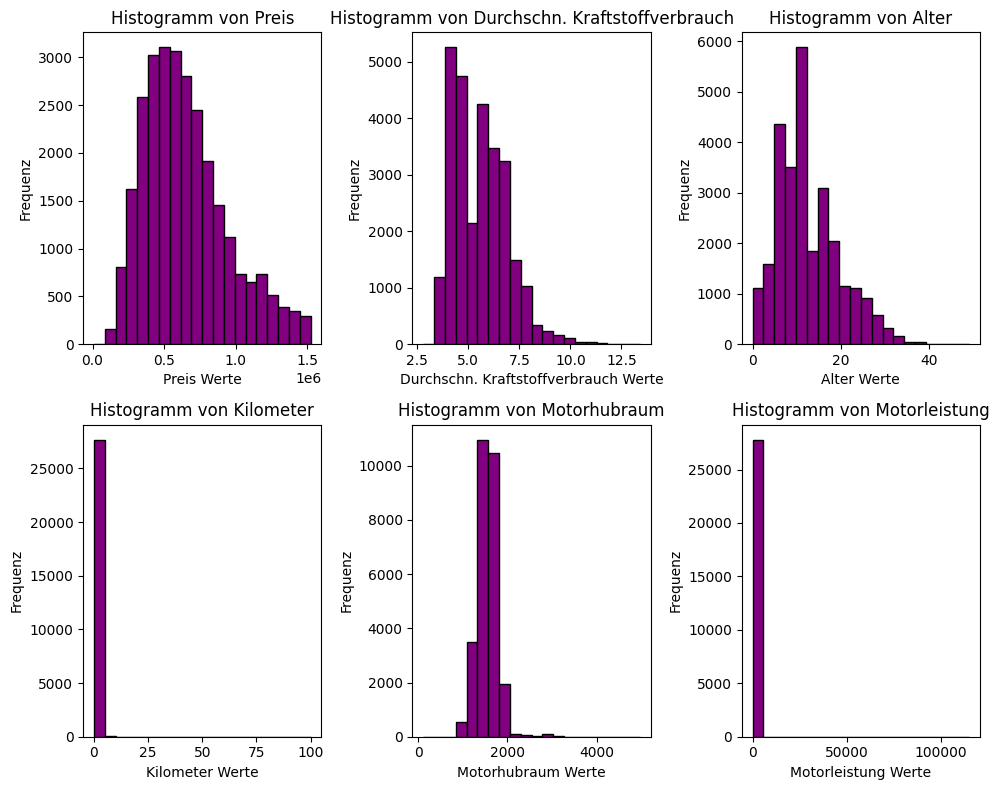

In [ ]:
# Definiere die Spalten, für die Histogramme erstellt werden sollen
columns_for_histograms = ['Preis', 'Durchschn. Kraftstoffverbrauch', 'Alter', 'Kilometer',"Motorhubraum","Motorleistung"]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))

# Flache das Achsen-Array ab, um die Indexierung zu vereinfachen
axes = axes.flatten()

# Iteriere über die ausgewählten Spalten und erstelle Histogramme
for i, column in enumerate(columns_for_histograms):
    hist, bins = np.histogram(df[column], bins=20)
    axes[i].bar(x=bins[:-1], height=hist, width=(bins[1] - bins[0]), align='edge', color='purple', edgecolor='black')
    axes[i].set_xlabel(f'{column} Werte')
    axes[i].set_ylabel('Frequenz')
    axes[i].set_title(f'Histogramm von {column}')

# Passe das Layout an
plt.tight_layout()
plt.show()

<div>
    <p> Um die kategorialen Daten besser zu analysieren, haben wir Barplot verwendet. Dadurch können wir die Verteilung der Fahrzeugmerkmale visualisieren.
</p>
</div>

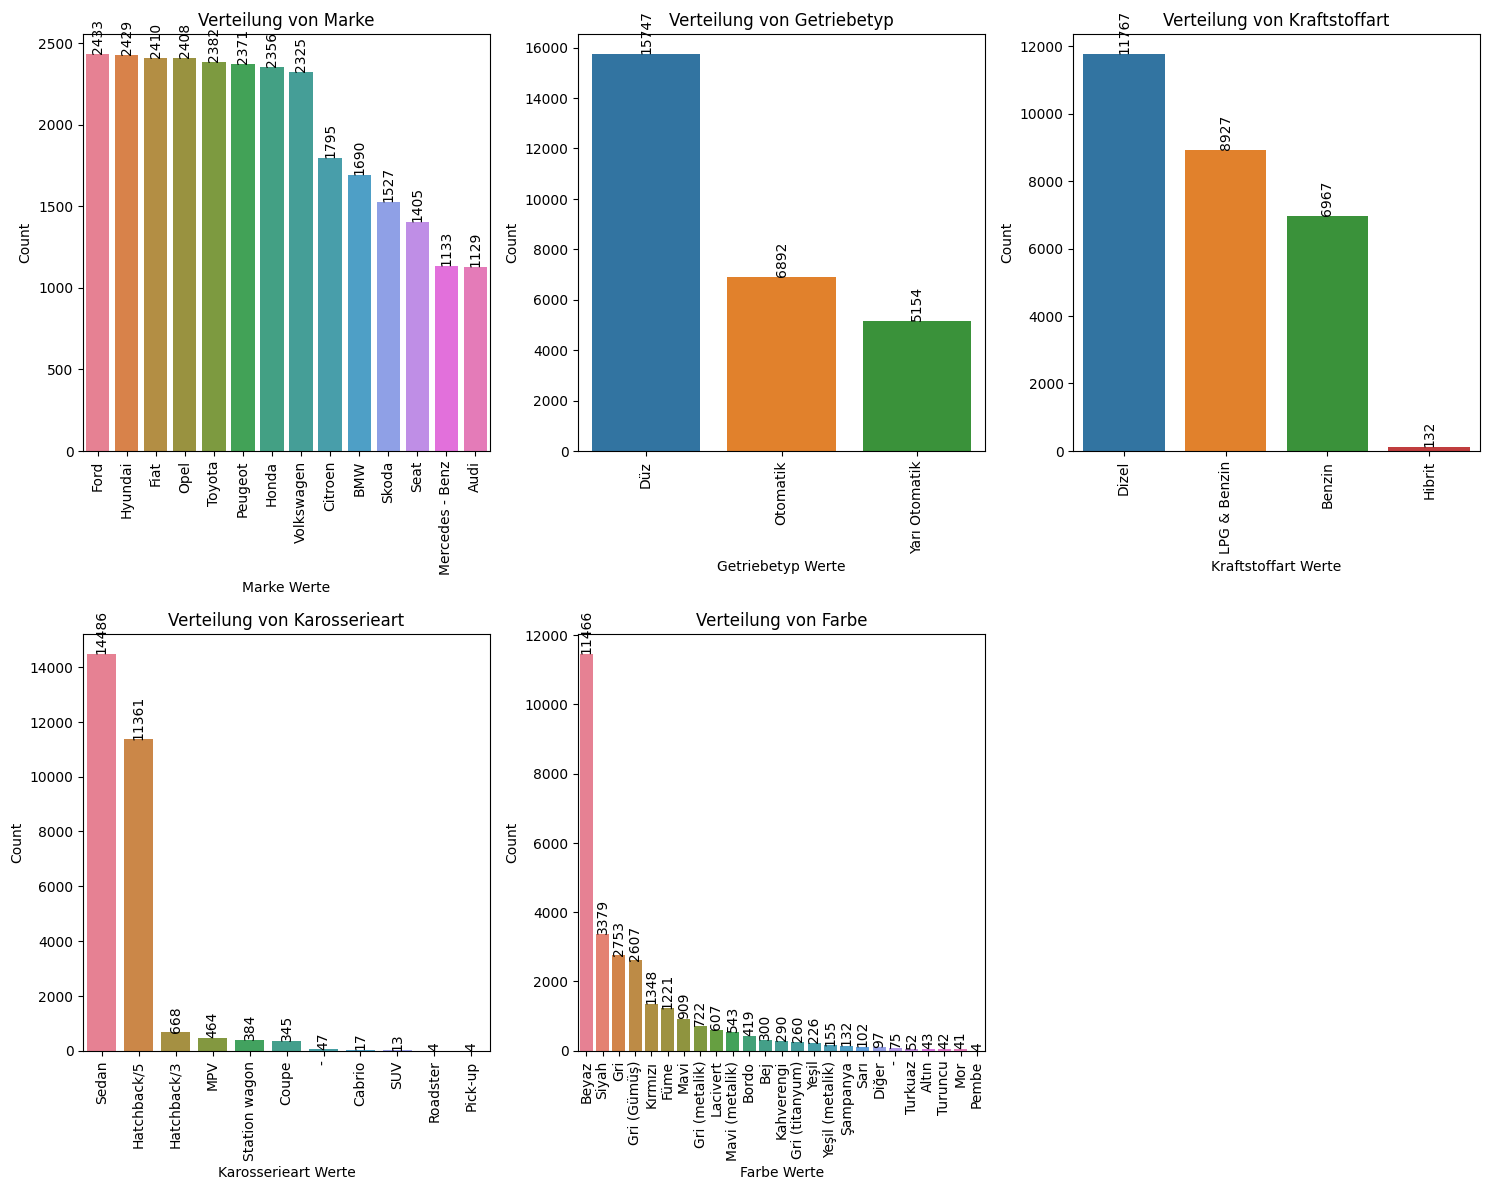

In [ ]:
# Definiere die Spalten, für die Diagramme erstellt werden sollen
columns_for_histograms = ['Marke', 'Getriebetyp', 'Kraftstoffart', 'Karosserieart', 'Farbe']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 12))

# Flache das Achsen-Array ab, um die Indexierung zu vereinfachen
axes = axes.flatten()

# Iteriere über die ausgewählten Spalten und erstelle Diagramme
for i, column in enumerate(columns_for_histograms):
    value_counts = df[column].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, ax=axes[i])
    axes[i].set_xlabel(f'{column} Werte')
    axes[i].set_xticks(range(len(value_counts.index)))
    axes[i].set_xticklabels(value_counts.index, rotation=90)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Verteilung von {column}')

    for index, value in enumerate(value_counts):
        axes[i].text(index, value + 0.1, str(value), ha='center', va='bottom',rotation=90)

# Passe das Layout an
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()


<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;">Welche Korrelationen lassen sich erkennen und welche Schlussfolgerungen ziehen Sie daraus?</h2>
</div>
</div>

<div>
    <p>Um Korrelationen zu sehen, haben wir zuerst covariance gerechnet. Aus der Tabelle haben wir die hohen Korrelationen erkannt.

</p>
</div>

In [ ]:
df_encoded = pd.read_csv("encoding.csv")
df_encoded.rename(columns = {'Marka':'Marke', 'Seri':'Serie',
                              'Model':'Modell', 'Yıl':'Jahr','Kilometre':'Kilometer','Vites Tipi':'Getriebetyp','Yakıt Tipi':'Kraftstoffart','Kasa Tipi':'Karosserieart','Renk':'Farbe','Motor Hacmi':'Motorhubraum','Motor Gücü':'Motorleistung','Çekiş':'Antrieb','Ort. Yakıt Tüketimi':'Durchschn. Kraftstoffverbrauch','Yakıt Deposu':'Kraftstofftank','Boya-değişen':'Lackwechsel','Fiyat':'Preis','Yaş':'Alter'}, inplace = True)

In [ ]:
#Welche Korrelationen lassen sich erkennen und welche Schlussfolgerungen ziehen Sie daraus?
# hoher corr: Preis- Alter (0.96), Preis - Kilometer (0.99), Durchschn. Kraftstoffverbrauch -Motorhubraum (0.93), Preis- Motorleistung (0.96)
#Alter- Motorhubraum (0.87) , Preis- Motorhubraum (0.96), Durchschn. Kraftstoffverbrauch - Alter(0.78)
numeric_columns = df_encoded.select_dtypes(include=[np.number])
covariance = np.abs(numeric_columns.cov())
covariance = (0.5 + 0.5 * (covariance - covariance.min()) / (covariance.max() - covariance.min())).round(2)
print(covariance)

                                Alter  Kilometer  \
Alter                            1.00       1.00   
Kilometer                        0.52       0.57   
Durchschn. Kraftstoffverbrauch   0.71       0.68   
Motorleistung                    0.50       0.50   
Motorhubraum                     0.55       0.59   
Preis                            0.96       0.99   

                                Durchschn. Kraftstoffverbrauch  Motorleistung  \
Alter                                                     0.78           0.65   
Kilometer                                                 0.51           0.50   
Durchschn. Kraftstoffverbrauch                            1.00           0.62   
Motorleistung                                             0.50           1.00   
Motorhubraum                                              0.57           0.62   
Preis                                                     0.67           0.96   

                                Motorhubraum  Preis  
Alter        

<div>
    <p>Wir haben den covariance matrix in einer Pairplot visualisert. In diesem Pairplots, war es einfacher Korellationen zu sehen und zu erkennen.
</p>
</divv

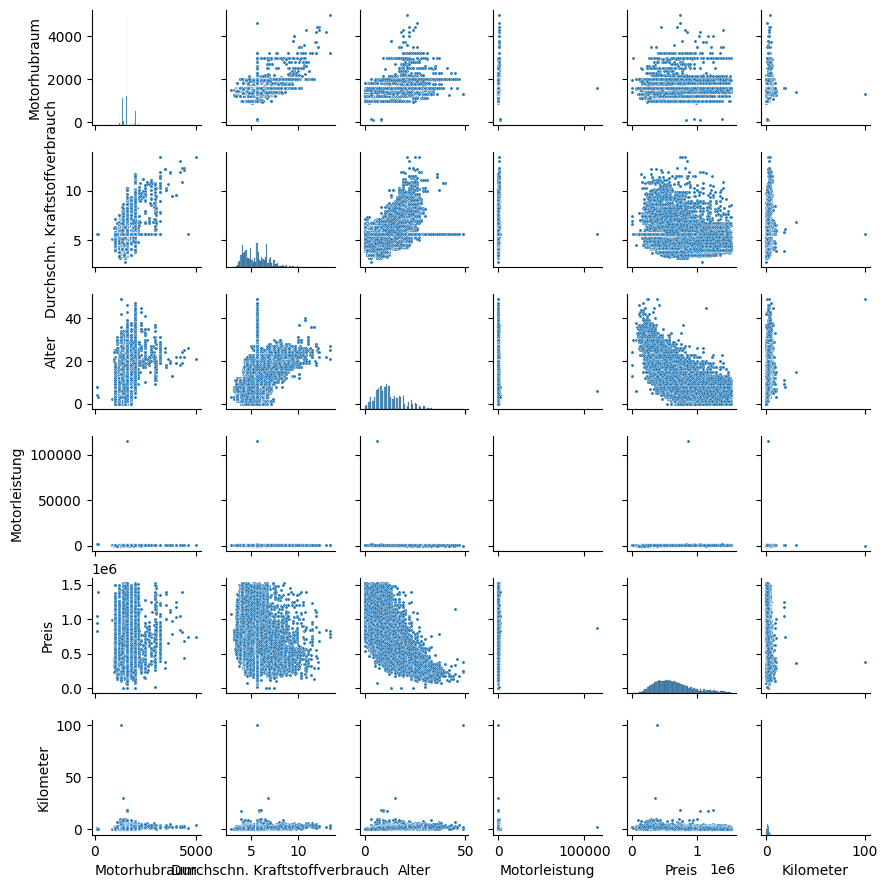

In [ ]:
# Kovarianzmatrix kopieren
covariance_matrix = covariance.copy()
# Diagonalelemente der Kopie auf 0 setzen
np.fill_diagonal(covariance_matrix.values, 0)
# Positionen finden, an denen die Kovarianz größer als 0.9 ist
covariance_matrix = np.where(covariance_matrix > 0.9)
# Features mit hoher Kovarianz extrahieren
covariance_features = list(set([numeric_columns.columns[i] for a in covariance_matrix for i in a]))
# DataFrame mit den ausgewählten Features erstellen
df_covariance = df[covariance_features]
# Pairplot-Diagramm für die ausgewählten Features erstellen
sns.pairplot(df_covariance, height=1.5, plot_kws={'s': 5})

<div>
    <p>Außerdem haben wir mit der Funktion corr. Korrelation zwischen Merkmalen berechnet. Auf diese Weise konnten wir die Richtung der Korrelationen erkennen.
        
Hohe Korrelationen: Preis - Alter (0.69), Kilometer -Alter (0.56), Durchschnittlicher Kraftstoffverbrauch - Alter(0.48), Preis - Kilometer(0.41)
</p>
</div>

In [ ]:
# hoher corr: Preis - Alter (0.69), Kilometer -Alter (0.56), Durchschnittlicher Kraftstoffverbrauch - Alter(0.48), Preis - Kilometer(0.41),Durchschnittlicher Kraftstoffverbrauch -Motorhubraum (0.35)
numeric_columns = df_encoded.select_dtypes(include=[np.number])
mat = numeric_columns.corr().round(2)
mat

,Alter,Kilometer,Durchschn. Kraftstoffverbrauch,Motorleistung,Motorhubraum,Preis
Alter,1.00,0.56,0.48,-0.01,0.26,-0.69
Kilometer,0.56,1.00,0.23,0.00,0.27,-0.41
Durchschn. Kraftstoffverbrauch,0.48,0.23,1.00,0.01,0.35,-0.22
Motorleistung,-0.01,0.00,0.01,1.00,0.03,0.03
Motorhubraum,0.26,0.27,0.35,0.03,1.00,0.15
Preis,-0.69,-0.41,-0.22,0.03,0.15,1.00


<div>
    <p>Wir haben diese Korellation Berechnung auch in einer Heatmap visualisiert. Mithilfe diesem Heatmap könnten wir mögliche Relationen und Korrelationen genauer sehen.

</p>
</div>

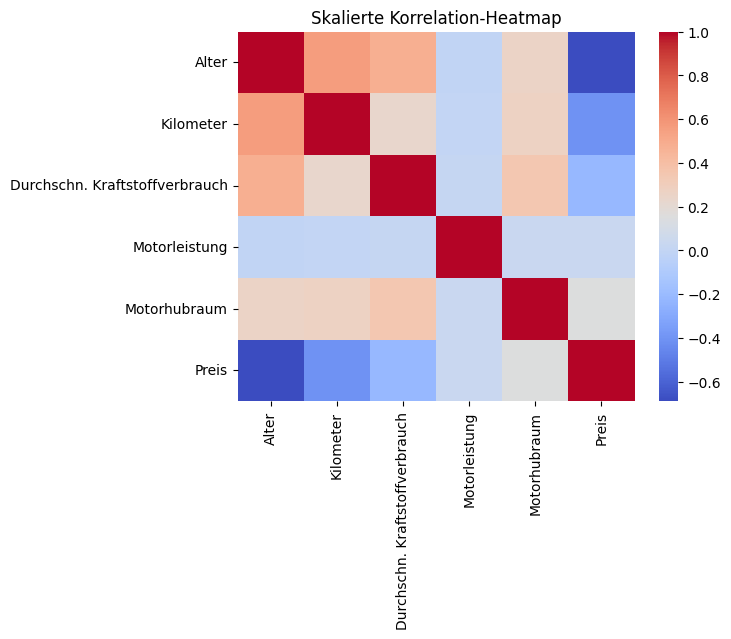

In [ ]:
# Die Heatmap plotten
plt.figure()
sns.heatmap(mat, cmap='coolwarm')
plt.title('Skalierte Korrelation-Heatmap')
plt.show()

<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;">Welche zusätzlichen Features können aus den Daten extrahiert werden? (Feature-Engineering)</h2>
</div>
</div>

<div>
    <p>
        Wir haben ein neues Feature namens 'Kraftstoffeffizienz' erstellt, welches das Verhältnis des durchschnittlichen Kraftstoffverbrauchs zur Motorhubraum berechnet und auf drei Dezimalstellen gerundet. Dieses neue Feature bietet einen zusätzlichen Einblick in die Kraftstoffeffizienz pro Motorhubraum. Bei unseren Analyse stellten wir jedoch fest, dass diese beiden Werte (Durchschn. Kraftstoffverbrauch, Motorhubraum) getrennt voneinander bessere Ergebnisse lieferten. Deshalb wird diese Feauture

Ein anderes Feature ist Alter. Am Anfang hatten wir Jahr des Fahrzeugs als eine Spalte. Um das verständlicher zu machen und eine einfachere Rechnung zu ermöglichen haben wir das ins Alter geändert, indem wir vom aktuellen Jahr das subtrahieren. Das ist eine Funktion, die sich ständig aktualisiert. Wir haben das schon im Teil „Bereinigung“ implementiert.
 </p>
</div>

In [ ]:
#Welche zusätzlichen Features können aus den Daten extrahiert werden? (Feature-Engineering)
df['Kraftstoffeffizienz'] = (df['Durchschn. Kraftstoffverbrauch'] / df['Motorhubraum']).round(3)

print(df[['Durchschn. Kraftstoffverbrauch', 'Motorleistung', 'Kraftstoffeffizienz', 'Alter']])

#current_year = datetime.now().year
#df["Alter"] = current_year - df["Jahr"]
#df.drop("Jahr", axis=1,inplace=True)

df.to_csv("featured_data.csv")

       Durchschn. Kraftstoffverbrauch  Motorleistung  Kraftstoffeffizienz  \
0                                 5.8          136.0                0.003   
1                                 4.5          116.0                0.005   
2                                 3.7          110.0                0.002   
3                                 4.4          116.0                0.004   
4                                 6.2          140.0                0.003   
...                               ...            ...                  ...   
27788                             5.6          119.0                0.004   
27789                             5.6          119.0                0.004   
27790                             5.6          119.0                0.004   
27791                             5.6          119.0                0.004   
27792                             5.6          119.0                0.004   

       Alter  
0         14  
1          6  
2          7  
3          4  


In [ ]:
df = pd.read_csv("featured_data.csv")

<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;">Welche statistischen Werte erscheinen Ihnen besonders relevant, um die Daten zu beschreiben?</h2>
</div>
</div>

<div>
    <p>
        Basierend auf den bisherigen Informationen, insbesondere den Datenstrukturen und den vorgenommenen Analysen, könnten folgende statistische Werte besonders relevant sein, um die Fahrzeugdaten zu beschreiben:

<b>Durchschnitt:</b>

Der Durchschnittswert von numerischen Merkmalen könnte einen Überblick über die zentralen Tendenzen der Daten bieten.

<b>Standardabweichung:</b>
Hohe Standardabweichungen könnten auf signifikante Variationen in den Daten hindeuten. Diesen statistischen Wert haben wir auch in der Korrelationsberechnung verwendet.

<b>Korrelationskoeffizienten:</b>

Die Korrelationskoeffizienten zwischen verschiedenen Merkmalen bieten Einblicke in die linearen Beziehungen zwischen diesen Merkmalen. Besonders relevante Korrelationen könnten wichtige Zusammenhänge in den Daten hervorheben.


</p>
</div>

<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 5px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;">Welche Art der Visualisierung wird eingesetzt und wieso?
       Welche Muster oder Trends lassen sich in den Daten erkennen?</h2>
</div>
</div>

<div>
    <p>
Um die Daten und unsere Erkenntnisse über Korrelationen zu visualisieren, haben wir zuerst versucht, das Linien-Diagramm zu nutzen. Obwohl wir mit dieser Methode grobe Tendenz und Muster erkennen können, ist diese Methode nicht geeignet für unseren Datensatz. Denn es gibt sehr viele Daten und es ist nicht möglich, den Verlauf in einem Liniendiagramm zu erkennen. Also war diese Methode nicht nützlich für uns.</p>
</div>

(100, 19)
(100, 19)
(100, 19)
(100, 19)


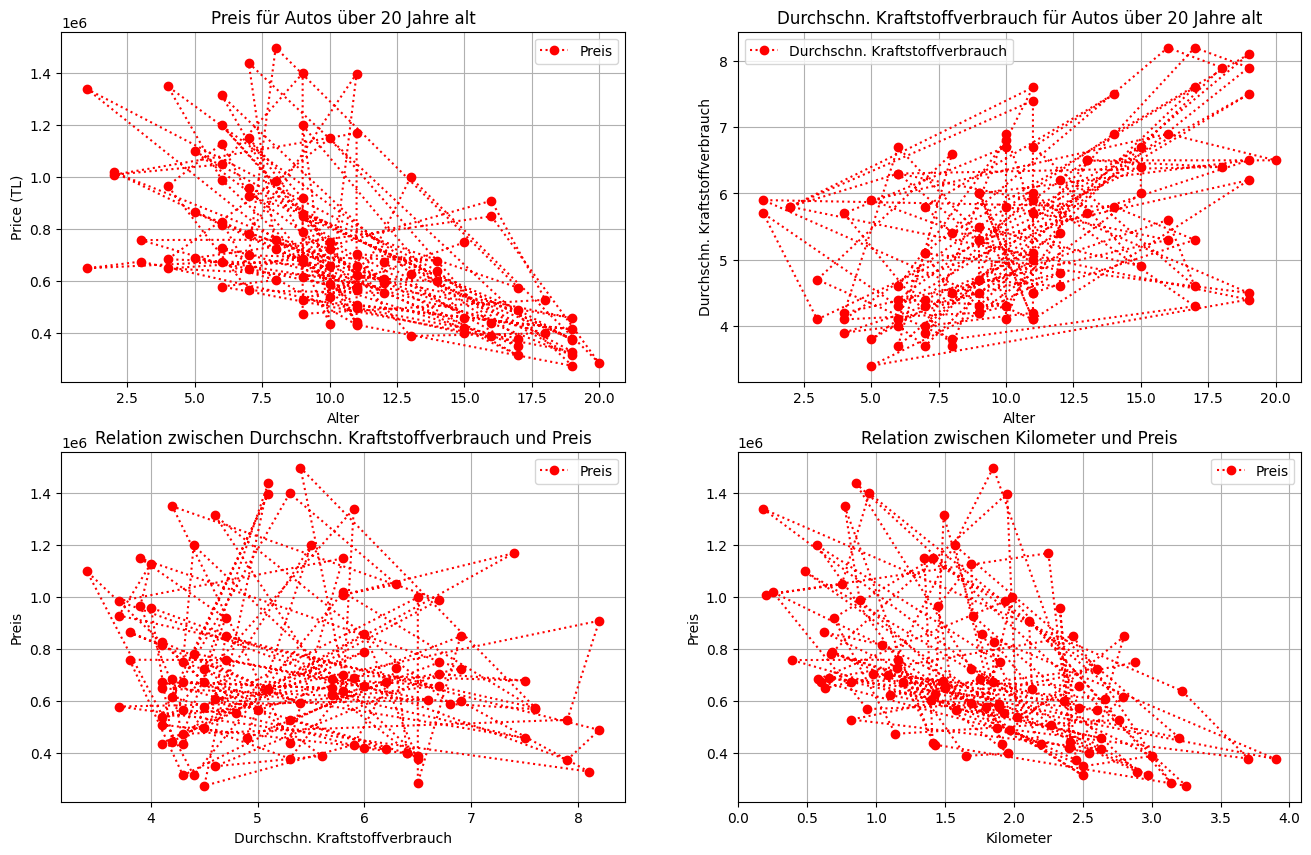

In [ ]:
#Welche Art der Visualisierung wird eingesetzt und wieso?
#Welche Muster oder Trends lassen sich in den Daten erkennen?
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
df_slice = df[(df['Alter'] <= 20)]
df_sample = df_slice.sample(n=100, random_state=42)
print(df_sample.shape)
plt.plot(df_sample['Alter'], df_sample['Preis'], linestyle=':', color='red', marker='o', label='Preis')
plt.title('Preis für Autos über 20 Jahre alt')
plt.xlabel('Alter')
plt.ylabel('Price (TL)')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
df_slice = df[(df['Alter'] <= 20)]
df_sample = df_slice.sample(n=100, random_state=42)
print(df_sample.shape)
plt.plot(df_sample['Alter'], df_sample['Durchschn. Kraftstoffverbrauch'], linestyle=':', color='red', marker='o', label='Durchschn. Kraftstoffverbrauch')
plt.title('Durchschn. Kraftstoffverbrauch für Autos über 20 Jahre alt')
plt.xlabel('Alter')
plt.ylabel('Durchschn. Kraftstoffverbrauch')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
df_sample = df_slice.sample(n=100, random_state=42)
print(df_sample.shape)
plt.plot(df_sample['Durchschn. Kraftstoffverbrauch'], df_sample['Preis'], linestyle=':', color='red', marker='o', label='Preis')
plt.title('Relation zwischen Durchschn. Kraftstoffverbrauch und Preis')
plt.xlabel('Durchschn. Kraftstoffverbrauch')
plt.ylabel('Preis')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
df_sample = df_slice.sample(n=100, random_state=42)
print(df_sample.shape)
plt.plot(df_sample['Kilometer'], df_sample['Preis'], linestyle=':', color='red', marker='o', label='Preis')
plt.title('Relation zwischen Kilometer und Preis')
plt.xlabel('Kilometer')
plt.ylabel('Preis')
plt.legend()
plt.grid(True)
plt.show()


<div>
    <p>Scatter Plots sind nützlich, um die Beziehung zwischen zwei numerischen Variablen zu zeigen. Deshalb haben wir Scatterplot benutzt. Diese Methode war für unsere Daten hinsichtlich der Mengen- und Verteilungsbeobachtung besser geeignet und verständlicher. Wir könnten auch die Tendenz besser erkennen. </p>
</div>

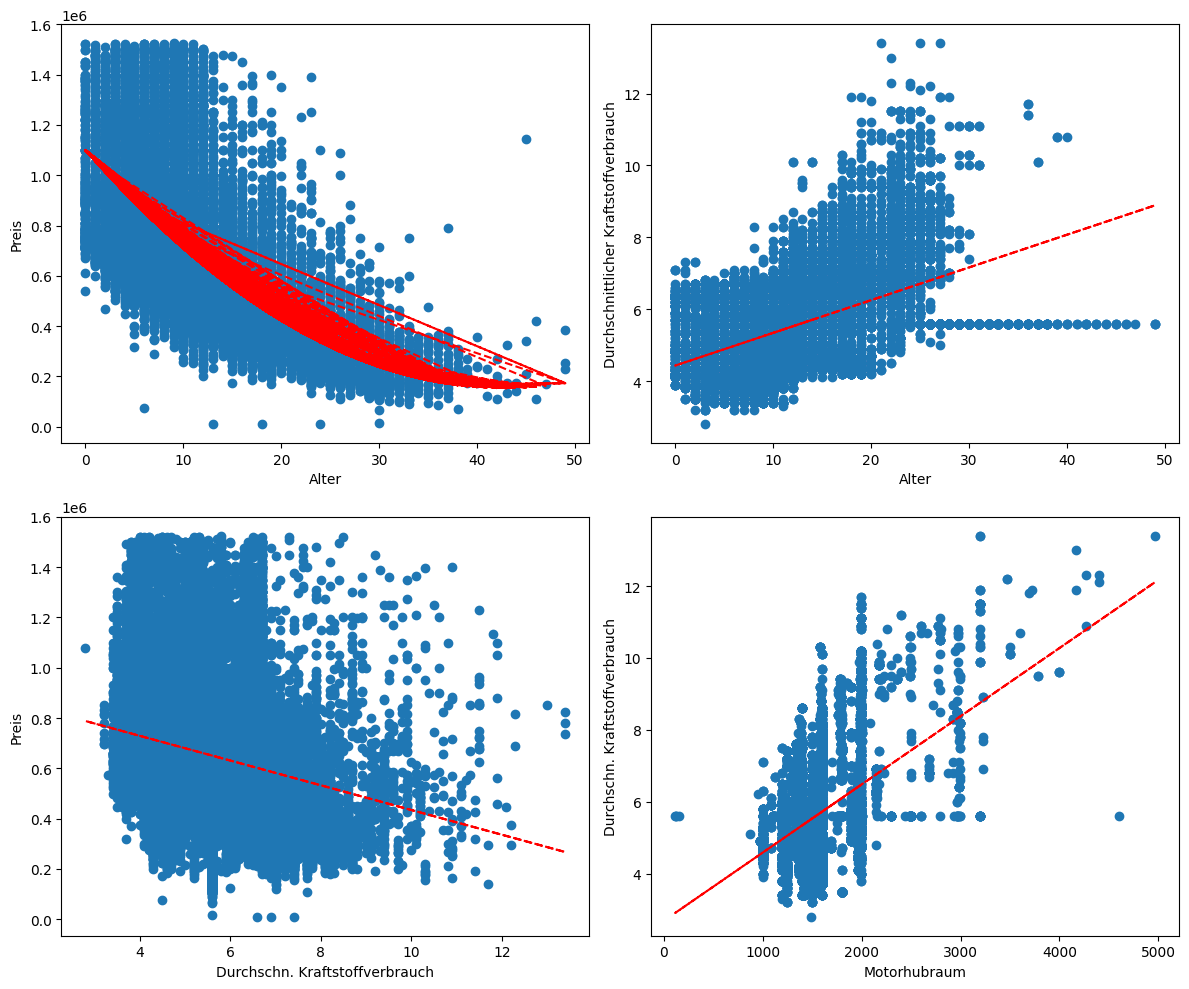

In [ ]:
#Welche Art der Visualisierung wird eingesetzt und wieso?
#Welche Muster oder Trends lassen sich in den Daten erkennen?

plt.figure(figsize=(12, 10))

# Oben links
plt.subplot(2, 2, 1)
plt.scatter(df['Alter'], df['Preis'], label='Data')
z = np.polyfit(df['Alter'], df['Preis'], 2)
p = np.poly1d(z)
regression_line = p(df['Alter'])
plt.plot(df['Alter'], regression_line, "r--", label='Quadratic Regression')
plt.ylabel('Preis')
plt.xlabel('Alter')


# Oben rechts
plt.subplot(2, 2, 2)
plt.scatter(df['Alter'], df['Durchschn. Kraftstoffverbrauch'])
z = np.polyfit(df['Alter'], df['Durchschn. Kraftstoffverbrauch'], 1)
p = np.poly1d(z)
regression_line = p(df['Alter'])
plt.plot(df['Alter'], regression_line, "r--", label='Linear Regression')
plt.xlabel('Alter')
plt.ylabel('Durchschnittlicher Kraftstoffverbrauch')


# Unten links
plt.subplot(2, 2, 3)
plt.scatter(df['Durchschn. Kraftstoffverbrauch'], df['Preis'])
z = np.polyfit(df['Durchschn. Kraftstoffverbrauch'], df['Preis'], 1)
p = np.poly1d(z)
regression_line = p(df['Durchschn. Kraftstoffverbrauch'])
plt.plot(df['Durchschn. Kraftstoffverbrauch'], regression_line, "r--", label='Linear Regression')
plt.ylabel('Preis')
plt.xlabel('Durchschn. Kraftstoffverbrauch')

# Unten rechts
plt.subplot(2, 2, 4)
plt.scatter(df['Motorhubraum'], df['Durchschn. Kraftstoffverbrauch'])
z = np.polyfit(df['Motorhubraum'], df['Durchschn. Kraftstoffverbrauch'], 1)
p = np.poly1d(z)
regression_line = p(df['Motorhubraum'])
plt.plot(df['Motorhubraum'], regression_line, "r--", label='Linear Regression')
plt.xlabel('Motorhubraum')
plt.ylabel('Durchschn. Kraftstoffverbrauch')



# Layout anpassen
plt.tight_layout()

#  Die Plots zeigen
plt.show()

<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 5px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;">Welche praktischen Implikationen oder Empfehlungen können auf der Grundlage der Erkenntnisse aus den Daten gegeben werden?</h2>
</div>
</div>

<div>
    <p>Aus diesen Ergebnissen identifizieren wir, dass Preise mit durchschnittlichen Kraftstoffverbrauch und Alter eine negative Korrelation hat und der durchschnittliche Kraftstoffverbrauch mit Alter und Motorhubraum eine positive Korrelation hat.  

Mit Hilfe von diesen Erkentnissen können ein Paar Empfehlungen für Verbraucher und für Hersteller gemacht werden.


<b>Für Verbraucher:</b> Verbraucher könnten bei der Auswahl eines Fahrzeugs darauf achten, Modelle mit einem günstigen Kraftstoffverbrauch zu wählen, da dies langfristig zu niedrigeren Betriebskosten führen kann. Ältere Fahrzeuge könnten tendenziell einen höheren Kraftstoffverbrauch aufweisen, daher könnte es sinnvoll sein, beim Kauf eines Gebrauchtwagens auf Modelle mit geringerem Alter und/oder effizienteren Motoren zu setzen.



<b>Für Hersteller:</b> Hersteller könnten verstärkt in die Entwicklung von energieeffizienteren Fahrzeugen investieren, um die Nachfrage nach kraftstoffsparenden Modellen zu befriedigen und wettbewerbsfähig zu bleiben.

</p>
</div>